In [1]:
import numpy as np 
import pandas as pd
import matplotlib as plt
from pylab import *
import seaborn as sns

In [2]:
df = pd.read_csv('churn_prediction.csv')
df.head()

,Unnamed: 0,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,101348.88,1
1,1,-0.440036,0,0,0.198164,1,0.117350,1,0,1,112542.58,0
2,2,-1.536794,0,0,0.293517,8,1.333053,3,1,0,113931.57,1
3,3,0.501521,0,0,0.007457,1,-1.225848,2,0,0,93826.63,0
4,4,2.063884,0,0,0.388871,2,0.785728,1,1,1,79084.10,0


In [3]:
del df['Unnamed: 0']

In [10]:
x = df.iloc[:,0:10] # input
y =  df.iloc[:,-1]  # output

In [12]:
from sklearn.preprocessing import MinMaxScaler
x = pd.DataFrame(MinMaxScaler().fit_transform(x))

## Kbest method

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best_Feature = SelectKBest(score_func=chi2 , k=10).fit(x,y)


In [19]:
col = ['CreditScore','Geography','Gender','Age','Tenure' ,'Balance','NumOfProducts'
,'HasCrCard','IsActiveMember','EstimatedSalary']

In [20]:
score = pd.DataFrame(best_Feature.scores_)
columns = pd.DataFrame(col)

In [21]:
features_score = pd.concat([columns, score] , axis = 1)
features_score.columns =['Features' ,  'score']

In [22]:
features_score

,Features,score
0,CreditScore,0.456316
1,Geography,225.464426
2,Gender,51.539926
3,Age,57.832080
4,Tenure,0.327054
5,Balance,28.502819
6,NumOfProducts,4.863425
7,HasCrCard,0.150041
8,IsActiveMember,118.199414
9,EstimatedSalary,0.241805


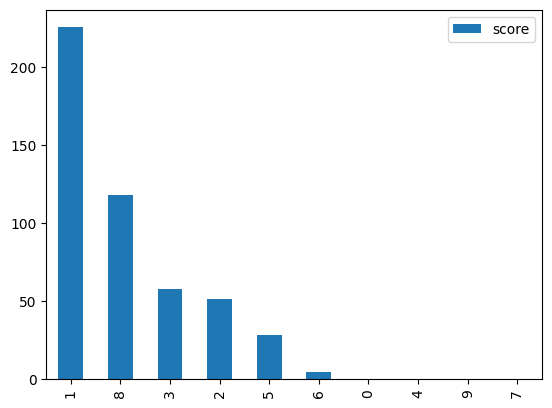

In [23]:
features_score.nlargest(10 , 'score').plot(kind='bar')
plt.show()